In [1]:
from skimage.feature import register_translation
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import numpy as np
import scipy
import tensorflow as tf
from sopt.examples.utils import PtychographySimulation
from sopt.examples.tensorflow.far_field_ptychography.tfPtycho import LMAPhaseRetriever
import sopt.benchmarks.ops.tensorflow.flops_registry_custom
from tensorflow.python.framework import graph_util
from sopt.benchmarks.ops.tensorflow.graph_utils_custom import get_flops_for_sub_graph, get_flops_for_node_list

W1205 01:16:38.737351 139765796734784 deprecation_wrapper.py:119] From /raid/home/skandel/code/sopt/sopt/benchmarks/ops/tensorflow/graph_utils_custom.py:14: The name tf.NodeDef is deprecated. Please use tf.compat.v1.NodeDef instead.

W1205 01:16:38.739384 139765796734784 deprecation_wrapper.py:119] From /raid/home/skandel/code/sopt/sopt/benchmarks/ops/tensorflow/graph_utils_custom.py:29: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.



In [2]:
%load_ext autoreload
%autoreload 2

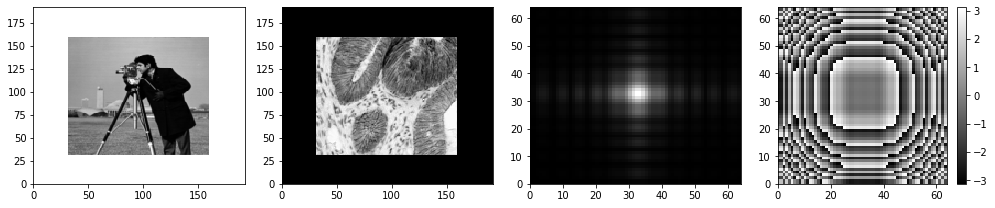

In [3]:
obj_padding_npix = 32
ptsim = PtychographySimulation(obj_npix=128, obj_padding_npix=obj_padding_npix,
                               positions_step_npix=6, probe_n_photons=1e4)

fig, axs = plt.subplots(1, 4, figsize=[14,3])
cax0 = axs[0].pcolormesh(np.abs(ptsim._obj_padded), cmap='gray')
cax1 = axs[1].pcolormesh(np.angle(ptsim._obj_padded), cmap='gray')
cax2 = axs[2].pcolormesh(np.abs(ptsim._probe_true), cmap='gray')
cax3 = axs[3].pcolormesh(np.angle(ptsim._probe_true), cmap='gray')
plt.colorbar(cax3)
plt.tight_layout()
plt.show()

In [4]:
ptsim._ndiffs

484

## LMA - reconstructing the object only

In [19]:
pr = LMAPhaseRetriever(ptsim=ptsim, probe_recons=False, validation_ndiffs=50, poisson_loss=True)
pr.setOptimizingParams()
pr.initSession()

W1205 01:20:52.495098 139765796734784 lma_new.py:143] The ftol, gtol, and xtol conditions are adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html.This is a test version, and there is no guarantee that these work as intended.


In [20]:
pr.run(max_iters=200)
pr.data.tail(n=1)

10  5340957 0.2086603       50 630585.5 631120.4
20  5330348 0.1565689       50 628869.6 628874.2
30  5328786 0.1408127       50 628257.4 628242.6


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: assertion failed: [Function update norm lower than tolerance specified] [Condition x > y did not hold element-wise:x (obj_opt_minimize_step/while/Abs_2:0) = ] [4.5] [y (obj_opt_minimize_step/while/Abs_1:0) = ] [5.32869816]
	 [[node obj_opt_minimize_step/while/assert_greater/Assert/AssertGuard/Assert (defined at /raid/home/skandel/code/sopt/sopt/optimizers/tensorflow/lma_new.py:186) ]]
	 [[obj_opt_minimize_step/while/LoopCond/_107]]
  (1) Invalid argument: assertion failed: [Function update norm lower than tolerance specified] [Condition x > y did not hold element-wise:x (obj_opt_minimize_step/while/Abs_2:0) = ] [4.5] [y (obj_opt_minimize_step/while/Abs_1:0) = ] [5.32869816]
	 [[node obj_opt_minimize_step/while/assert_greater/Assert/AssertGuard/Assert (defined at /raid/home/skandel/code/sopt/sopt/optimizers/tensorflow/lma_new.py:186) ]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'obj_opt_minimize_step/while/assert_greater/Assert/AssertGuard/Assert':
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-63df46a004d5>", line 2, in <module>
    pr.setOptimizingParams()
  File "/raid/home/skandel/code/sopt/sopt/examples/tensorflow/far_field_ptychography/tfPtycho.py", line 423, in setOptimizingParams
    self._optparams.obj_minimize_op = self._optparams.obj_optimizer.minimize()
  File "/raid/home/skandel/code/sopt/sopt/optimizers/tensorflow/lma_new.py", line 223, in minimize
    back_prop=False)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 3501, in while_loop
    return_same_structure)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 3012, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2937, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "/raid/home/skandel/code/sopt/sopt/optimizers/tensorflow/lma_new.py", line 186, in _body
    message='Function update norm lower than tolerance specified')
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/ops/check_ops.py", line 1031, in assert_greater
    return control_flow_ops.Assert(condition, data, summarize=summarize)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/util/tf_should_use.py", line 193, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs))
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 171, in Assert
    guarded_assert = cond(condition, no_op, true_assert, name="AssertGuard")
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 1988, in cond
    orig_res_f, res_f = context_f.BuildCondBranch(false_fn)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 1814, in BuildCondBranch
    original_result = fn()
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 169, in true_assert
    condition, data, summarize, name="Assert")
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/ops/gen_logging_ops.py", line 74, in _assert
    name=name)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [8]:
pr.data.tail(n=5)

,loss,epoch,obj_error,probe_error,validation_loss,patience
26,5370983.5,26.0,0.140064,NaN,600294.1875,50.0
27,5370880.0,27.0,0.139406,NaN,600268.1250,50.0
28,5370821.5,28.0,0.139037,NaN,600290.1250,50.0
29,5370782.0,29.0,0.138762,NaN,600260.1875,50.0
30,5370766.5,30.0,0.138565,NaN,600285.2500,50.0


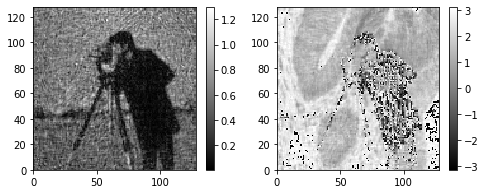

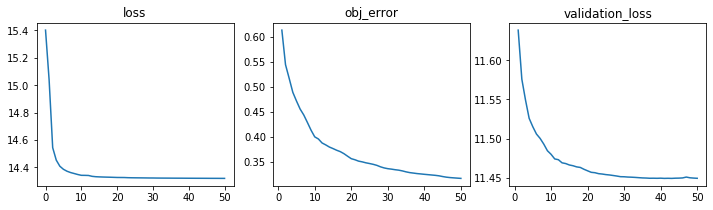

In [32]:
pr.genPlotsRecons()
pr.genPlotMetrics()

In [17]:
with pr.graph.as_default():
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()    
    flops_lma_and_fwd = tf.profiler.profile(run_meta=run_meta, cmd='scope', options=opts) 
    flops_lma_and_fwd = flops_lma_and_fwd.total_float_ops
    print(f'{flops_lma_and_fwd:4.3g}')

# To calculate the flops required for one conjugate gradient step (within the LMA routine),
# I am isolating the nodes involved in the conjugate gradient calculation.
# Since the conjugate gradient loop is self-contained, we can estimate the cost of
# each cg iteration in this fashion.
graph_def = pr.graph.as_graph_def()
nodes_cg = [node for node in graph_def.node if 'cg_while' in node.name]
flops_cg = get_flops_for_node_list(pr.graph, nodes_cg)

nodes_validation = [node for node in graph_def.node if 'validation' in node.name]
flops_validation = get_flops_for_node_list(pr.graph, nodes_validation)
print(f'flops_cg {flops_cg:4.3g}  flops_validation {flops_validation:4.3g}')

cg_iter_count = pr.session.run(pr._optparams.obj_optimizer._total_cg_iterations)
outer_iterations = pr.data.index[-1] #session.run(opt._iteration)

total_flops = (flops_lma_and_fwd - flops_validation) * outer_iterations + (cg_iter_count - outer_iterations) * flops_cg
print(f'total flops {total_flops:4.3g}')

W1128 18:41:33.561607 140186700158784 deprecation.py:323] From /raid/home/skandel/miniconda3/envs/ad/lib/python3.7/site-packages/tensorflow/python/profiler/internal/flops_registry.py:142: tensor_shape_from_node_def_name (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


3.35e+09
flops_cg 1.25e+09  flops_validation 8.9e+06
total flops 1.48e+12


In [12]:
with pr.graph.as_default():
    run_meta = tf.RunMetadata()
    opts = tf.profiler.ProfileOptionBuilder.float_operation()    
    flops_lma_and_fwd = tf.profiler.profile(run_meta=run_meta, cmd='scope', options=opts) 
    flops_lma_and_fwd = flops_lma_and_fwd.total_float_ops
    print(f'{flops_lma_and_fwd:4.3g}')

# To calculate the flops required for one conjugate gradient step (within the LMA routine),
# I am isolating the nodes involved in the conjugate gradient calculation.
# Since the conjugate gradient loop is self-contained, we can estimate the cost of
# each cg iteration in this fashion.
graph_def = pr.graph.as_graph_def()
nodes_cg = [node for node in graph_def.node if 'cg_while' in node.name]
flops_cg = get_flops_for_node_list(pr.graph, nodes_cg)

nodes_validation = [node for node in graph_def.node if 'validation' in node.name]
flops_validation = get_flops_for_node_list(pr.graph, nodes_validation)
print(f'flops_cg {flops_cg:4.3g}  flops_validation {flops_validation:4.3g}')

cg_iter_count = pr.session.run(pr._optparams.obj_optimizer._total_cg_iterations)
outer_iterations = pr.data.index[-1] #session.run(opt._iteration)

total_flops = (flops_lma_and_fwd - flops_validation) * outer_iterations + (cg_iter_count - outer_iterations) * flops_cg
print(f'total flops {total_flops:4.3g}')

2.28e+09
flops_cg 6.13e+08  flops_validation 2.28e+07
total flops 2.13e+11
